In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
print(os.listdir())


['.config', 'sample_data']


In [ ]:
data = pd.read_csv('/frauddetection.csv', on_bad_lines='skip')
data.head()

/tmp/ipython-input-828480490.py:1: DtypeWarning: Columns (2,4,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/frauddetection.csv', on_bad_lines='skip')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(2454563, 11)

#knowing information of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454563 entries, 0 to 2454562
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          object 
 3   nameOrig        object 
 4   oldbalanceOrg   object 
 5   newbalanceOrig  object 
 6   nameDest        object 
 7   oldbalanceDest  object 
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 206.0+ MB


mean,count,minium,maximum values of data


In [ ]:
data.describe()

,step,newbalanceDest,isFraud,isFlaggedFraud
count,2.454563e+06,2.454557e+06,2.454554e+06,2.454550e+06
mean,3.577348e+02,1.406080e+06,2.019511e-03,5.296286e-06
std,1.392573e+02,4.742061e+06,4.489358e-02,2.301361e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.560000e+02,2.046810e+05,0.000000e+00,0.000000e+00
75%,3.990000e+02,1.125084e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,3.561793e+08,1.000000e+00,1.000000e+00


#data visualization


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 7
Integer variables: 1
Float variables: 3


**count plot of payment type using seaborn library**

<Axes: xlabel='type', ylabel='count'>

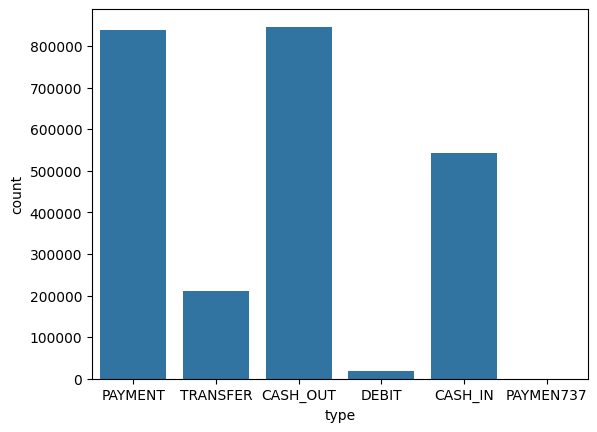

In [ ]:
sns.countplot(x='type', data=data)

#count of distributed data

In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,2449597
1.0,4957


#distribution of step column using displot

<Figure size 1500x600 with 0 Axes>

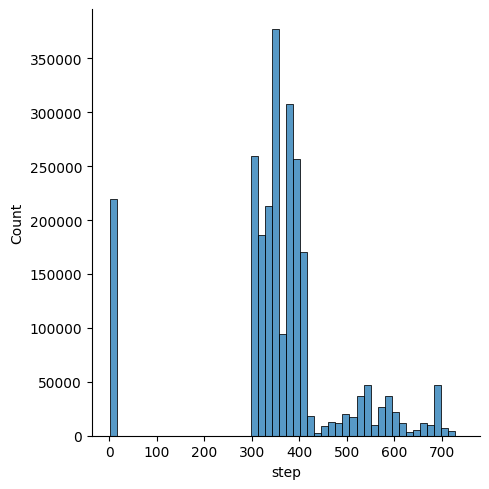

In [ ]:
plt.figure(figsize=(15, 6))
sns.displot(data['step'], bins=50)

# correlation among different features





<Axes: >

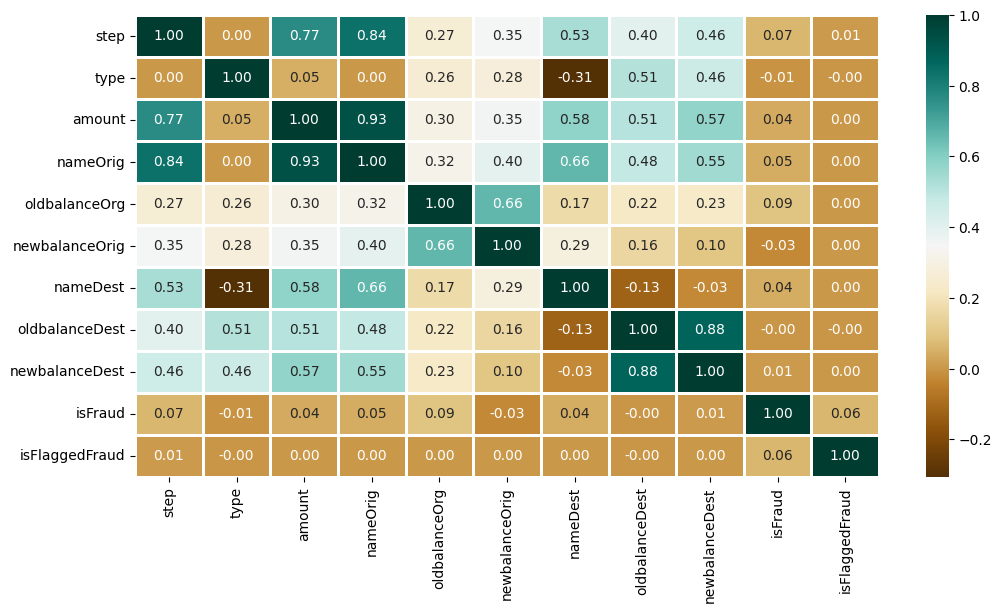

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

#datapreprocessing

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMEN737,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,False,True,False
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0,False,False,False,False,True
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,False,True,False


In [ ]:
# Convert problematic object columns to numeric, coercing errors
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']:
    data_new[col] = pd.to_numeric(data_new[col], errors='coerce')

X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

# Fill NaN values (introduced by errors='coerce') with 0.
# For financial data, 0 can be a sensible default for missing or non-existent balances/amounts.
X = X.fillna(0)

# Ensure the target variable 'isFraud' is also clean, though it's already float64
y = pd.to_numeric(y, errors='coerce').fillna(0)

#shape of extracted data


In [ ]:
X.shape, y.shape

((2454563, 12), (2454563,))

# splitting into training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# lets import revelant models

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

#cleaning because only numeric values are read

In [ ]:
X_train.select_dtypes(include='object').columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest'], dtype='object')

cleaning and handling missing vakues

training

In [ ]:
import re

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
        X_test[col] = X_test[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)

        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# checking nan in y

In [ ]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(6), np.int64(3))

In [ ]:
print(X_train.isnull().sum())


step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
CASH_OUT          0
DEBIT             0
PAYMEN737         0
PAYMENT           0
TRANSFER          0
dtype: int64


# checking if it contains object type

In [ ]:
print(X.dtypes)


step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud    float64
CASH_OUT             bool
DEBIT                bool
PAYMENT              bool
TRANSFER             bool
dtype: object


#droping obj types

In [ ]:
print(X.select_dtypes(include='object').columns)


Index([], dtype='object')


In [ ]:
X = X.select_dtypes(exclude='object')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print(X_train.dtype)


float64


In [ ]:
print(pd.isnull(X_train).sum())
print(pd.isnull(X_test).sum())


0
0


#Training

In [ ]:
models = [LogisticRegression(max_iter=1000),
          XGBClassifier(eval_metric='logloss'),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for model in models:
    model.fit(X_train, y_train)
    print(model)

    train_preds = model.predict_proba(X_train)[:,1]
    print("Training AUC:", ras(y_train, train_preds))

    y_preds = model.predict_proba(X_test)[:,1]
    print("Validation AUC:", ras(y_test, y_preds))
    print()


LogisticRegression(max_iter=1000)
Training AUC: 0.9829882989588796
Validation AUC: 0.9837672647825564

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)
Training AUC: 0.9904915805258766
Validation AUC: 0.9861582675667232

RandomForestClassifier(criterion='entropy', n_es

# model evaluation is xgbclassifier plotting confusion matrix

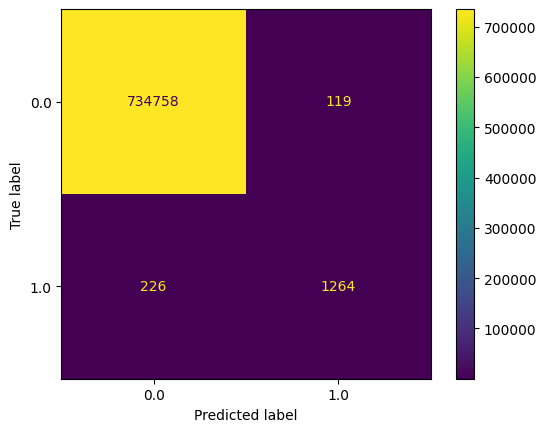

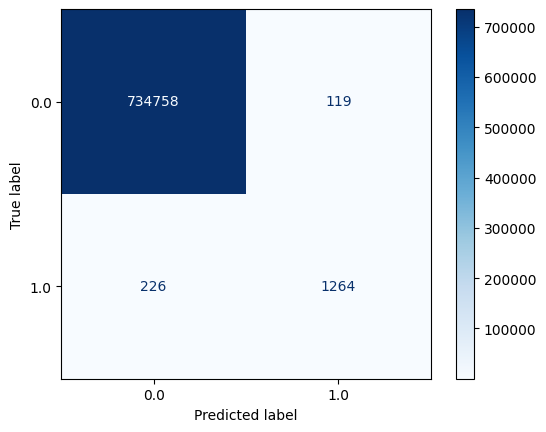

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()